# 1. Data Preparation

## 1.1. Library

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## 1.2. Data Loading

In [2]:
dataset_path = "./neo.csv"
neos = pd.read_csv(dataset_path)
neos.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
neos = neos.drop(["id", "name", "orbiting_body", "sentry_object"], axis="columns")
neos.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


# 2. Exploratory Data Analysis (EDA)

## 2.1. Exploratory Data

In [4]:
neos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


In [5]:
neos.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


## 2.2. Missing Values 

In [6]:
for header in neos.columns:
    data = neos[f"{header}"]
    print(header + " has [" + str(data.isnull().sum()) + "] values")

est_diameter_min has [0] values
est_diameter_max has [0] values
relative_velocity has [0] values
miss_distance has [0] values
absolute_magnitude has [0] values
hazardous has [0] values


## 2.3. Outliers

In [7]:
numerical_features = ["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"]

<Axes: xlabel='absolute_magnitude'>

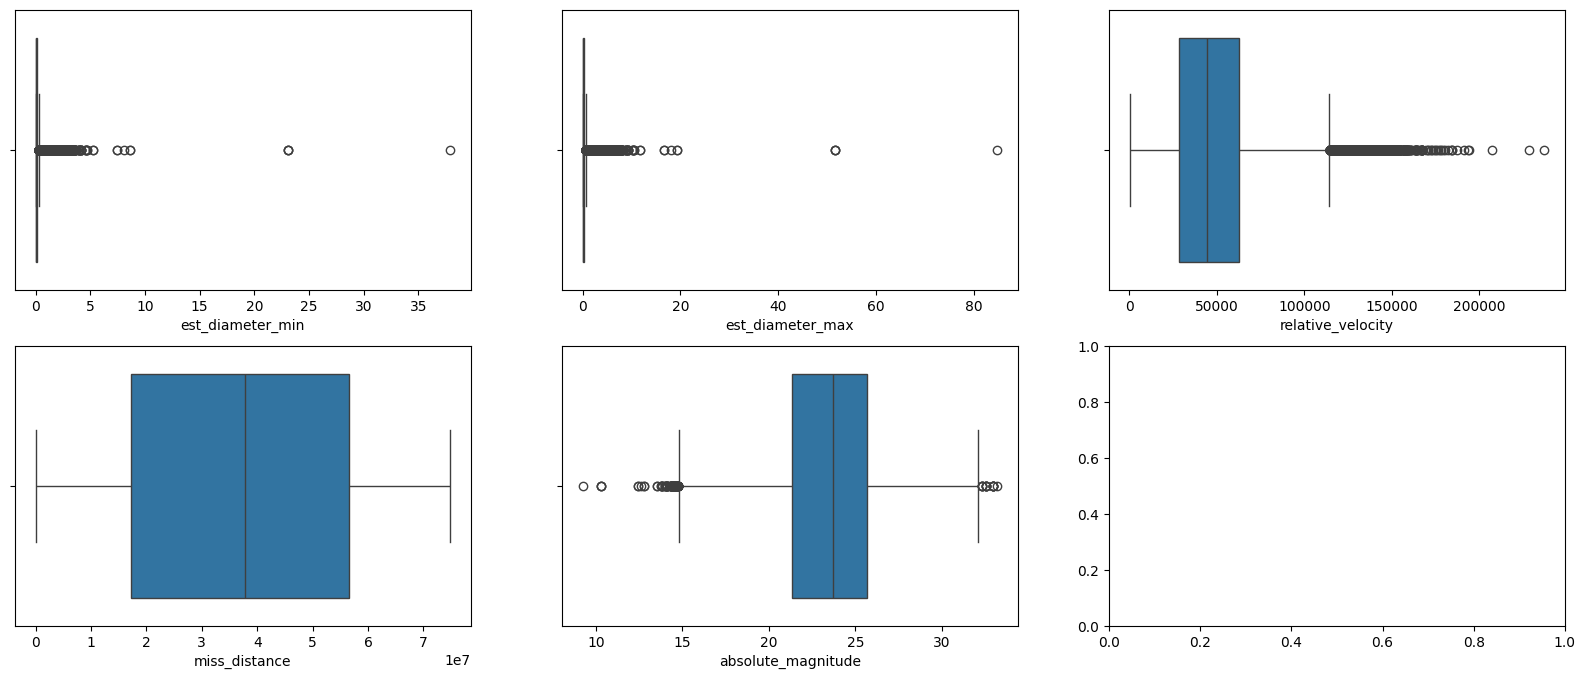

In [8]:
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20)
fig.set_figheight(8)
sns.boxplot(x=neos[numerical_features[0]], ax=axs[0, 0])
sns.boxplot(x=neos[numerical_features[1]], ax=axs[0, 1])
sns.boxplot(x=neos[numerical_features[2]], ax=axs[0, 2])
sns.boxplot(x=neos[numerical_features[3]], ax=axs[1, 0])
sns.boxplot(x=neos[numerical_features[4]], ax=axs[1, 1])

In [9]:
Q1 = neos[numerical_features].quantile(0.25)
Q3 = neos[numerical_features].quantile(0.75)
IQR = Q3 - Q1
neos = neos[~((neos[numerical_features]<(Q1-1.5*IQR))|(neos[numerical_features]>(Q3+1.5*IQR))).any(axis=1)]
neos.shape

(81635, 6)

<Axes: xlabel='absolute_magnitude'>

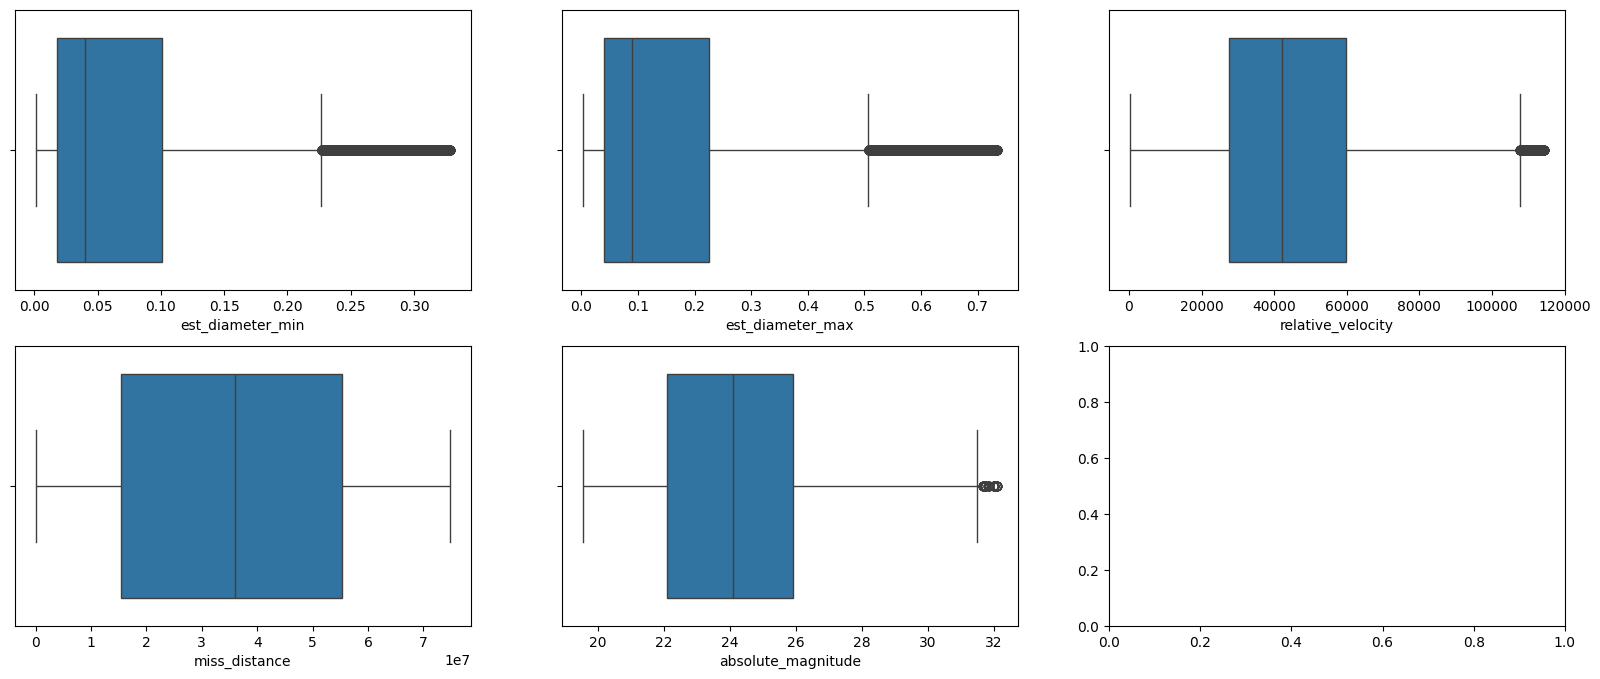

In [10]:
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20)
fig.set_figheight(8)
sns.boxplot(x=neos[numerical_features[0]], ax=axs[0, 0])
sns.boxplot(x=neos[numerical_features[1]], ax=axs[0, 1])
sns.boxplot(x=neos[numerical_features[2]], ax=axs[0, 2])
sns.boxplot(x=neos[numerical_features[3]], ax=axs[1, 0])
sns.boxplot(x=neos[numerical_features[4]], ax=axs[1, 1])

## 2.4. Distribusi Hazardous dan Non-Hazardous

In [11]:
neos["hazardous"].value_counts()

hazardous
False    75179
True      6456
Name: count, dtype: int64

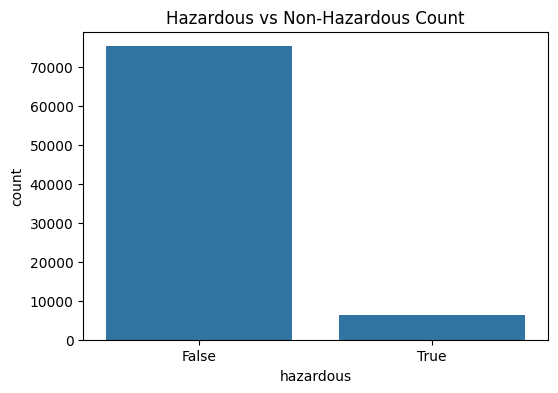

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=neos, x="hazardous")
plt.title('Hazardous vs Non-Hazardous Count')
plt.show()

## 2.5 Analisis Korelasi

### 2.5.1. Heatmap

<Axes: >

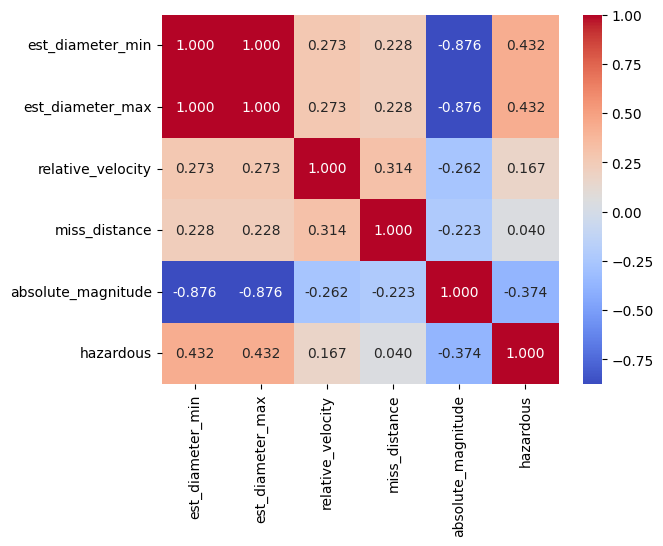

In [13]:
corr_matrix = neos.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm')

### 2.5.2. Pairplot

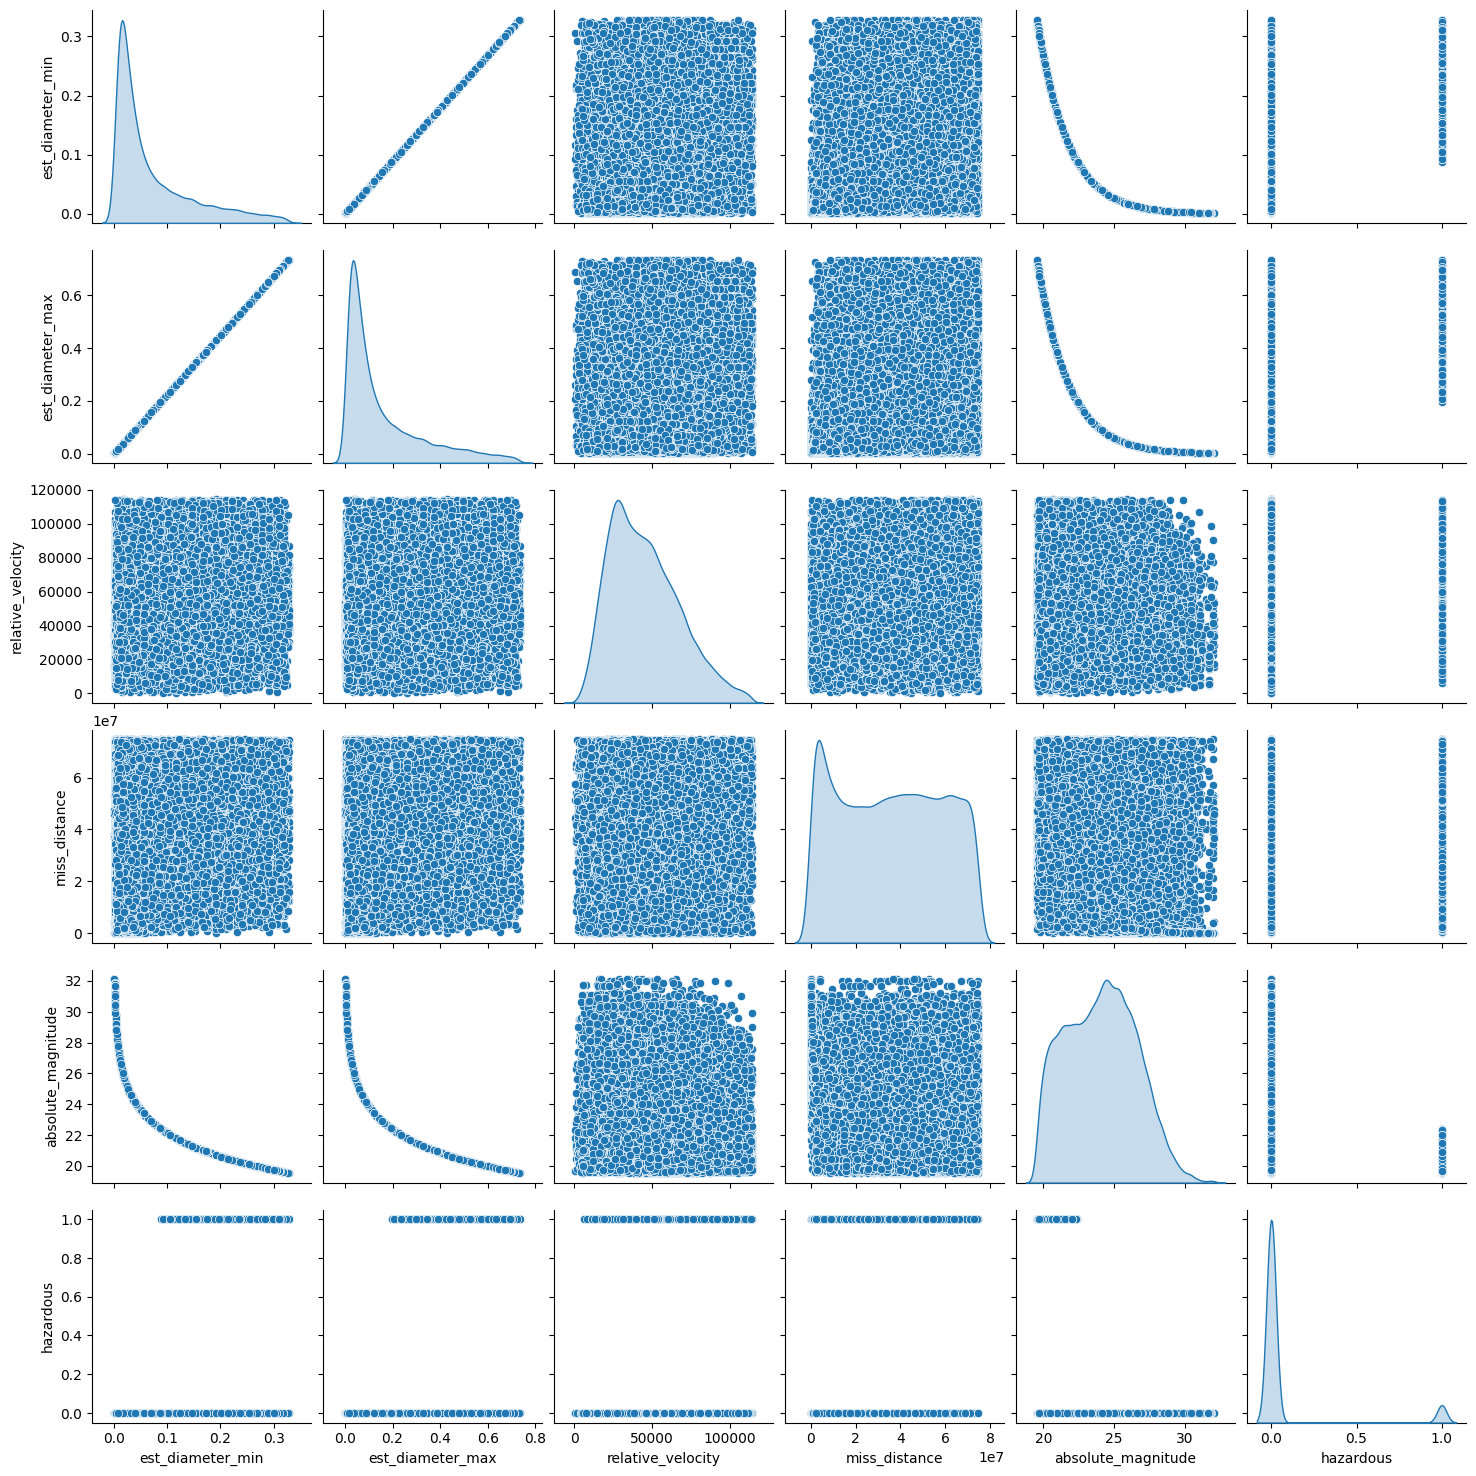

In [14]:
sns.pairplot(neos, diag_kind = 'kde')

# 3. Data Preprocessing

Data Splitting

In [15]:
X = neos.drop(["hazardous"], axis=1)
y = neos["hazardous"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

In [16]:
y_train.value_counts()

hazardous
False    67663
True      5808
Name: count, dtype: int64

In [17]:
from imblearn.under_sampling import RandomUnderSampler

undersampling = RandomUnderSampler(random_state=22, sampling_strategy = 'majority')

X_train, y_train = undersampling.fit_resample(X_train, y_train)
X_test, y_test = undersampling.fit_resample(X_test, y_test)

In [18]:
y_train.value_counts()

hazardous
False    5808
True     5808
Name: count, dtype: int64

Standaritation

In [19]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=numerical_features)
X_train.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,-1.229375,-1.229375,0.551973,1.383471,1.515847
1,-1.223415,-1.223415,0.886459,-1.587159,1.483422
2,-1.071304,-1.071304,-1.030223,-0.270912,0.907874
3,-1.178829,-1.178829,-1.047323,-1.473573,1.272658
4,0.521281,0.521281,1.341001,0.452122,-0.672856


# 4. Modelling

In [20]:
models_mse = pd.DataFrame(index=["train_mse", "test_mse"], columns=["Random Forest", "Boosting", "SVM", "KNN", "Neural Networks", "Logistic"])
models_mse.head()

,Random Forest,Boosting,SVM,KNN,Neural Networks,Logistic
train_mse,NaN,NaN,NaN,NaN,NaN,NaN
test_mse,NaN,NaN,NaN,NaN,NaN,NaN


## 4.1. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# randomForest = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=22, n_jobs=-1)
randomForest = RandomForestClassifier(random_state=22)
randomForest.fit(X_train, y_train)

models_mse.loc["train_mse", "Random Forest"] = mean_squared_error(y_pred= randomForest.predict(X_train).astype(np.float64), y_true=y_train.astype(np.float64))
models_mse.loc["test_mse", "Random Forest"] = mean_squared_error(y_pred= randomForest.predict(X_test).astype(np.float64), y_true=y_test.astype(np.float64))

In [22]:
y_pred = randomForest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.50      1.00      0.67       648
        True       0.00      0.00      0.00       648

    accuracy                           0.50      1296
   macro avg       0.25      0.50      0.33      1296
weighted avg       0.25      0.50      0.33      1296



/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.2. Boosting

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# boosting =  AdaBoostRegressor(learning_rate=0.05, random_state=22)
boosting =  AdaBoostClassifier(algorithm="SAMME", random_state=22)
boosting.fit(X_train, y_train)
models_mse.loc["train_mse", "Boosting"] = mean_squared_error(y_pred=boosting.predict(X_train).astype(np.float64), y_true=y_train.astype(np.float64))
models_mse.loc["test_mse", "Boosting"] = mean_squared_error(y_pred= boosting.predict(X_test).astype(np.float64), y_true=y_test.astype(np.float64))

In [24]:
y_pred = boosting.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.50      1.00      0.67       648
        True       0.00      0.00      0.00       648

    accuracy                           0.50      1296
   macro avg       0.25      0.50      0.33      1296
weighted avg       0.25      0.50      0.33      1296



/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.3. Support Vector Machine

In [25]:
from sklearn.svm import SVC

svc = SVC(random_state=22)
svc.fit(X_train, y_train)

models_mse.loc["train_mse", "SVM"] = mean_squared_error(y_pred=svc.predict(X_train).astype(np.float64), y_true=y_train.astype(np.float64))
models_mse.loc["test_mse", "SVM"] = mean_squared_error(y_pred=svc.predict(X_test).astype(np.float64), y_true=y_test.astype(np.float64))

In [26]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.50      1.00      0.67       648
        True       0.00      0.00      0.00       648

    accuracy                           0.50      1296
   macro avg       0.25      0.50      0.33      1296
weighted avg       0.25      0.50      0.33      1296



/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.4. K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

models_mse.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train).astype(np.float64), y_true=y_train.astype(np.float64))
models_mse.loc["test_mse", "KNN"] = mean_squared_error(y_pred= knn.predict(X_test).astype(np.float64), y_true=y_test.astype(np.float64))

In [28]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.68      0.08      0.14       648
        True       0.51      0.96      0.67       648

    accuracy                           0.52      1296
   macro avg       0.60      0.52      0.40      1296
weighted avg       0.60      0.52      0.40      1296



## 4.5. Neural Networks

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

models_mse.loc['train_mse','Neural Networks'] = mean_squared_error(y_pred = mlp.predict(X_train).astype(np.float64), y_true=y_train.astype(np.float64))
models_mse.loc["test_mse", "Neural Networks"] = mean_squared_error(y_pred= mlp.predict(X_test).astype(np.float64), y_true=y_test.astype(np.float64))

In [30]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       648
        True       0.50      1.00      0.67       648

    accuracy                           0.50      1296
   macro avg       0.25      0.50      0.33      1296
weighted avg       0.25      0.50      0.33      1296



/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.6. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=22)
logistic.fit(X_train, y_train)

models_mse.loc['train_mse','Logistic'] = mean_squared_error(y_pred = logistic.predict(X_train).astype(np.float64), y_true=y_train.astype(np.float64))
models_mse.loc["test_mse", "Logistic"] = mean_squared_error(y_pred= logistic.predict(X_test).astype(np.float64), y_true=y_test.astype(np.float64))

In [32]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.50      1.00      0.67       648
        True       0.00      0.00      0.00       648

    accuracy                           0.50      1296
   macro avg       0.25      0.50      0.33      1296
weighted avg       0.25      0.50      0.33      1296



/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 5. Evaluasi

In [33]:
models_mse.head()

,Random Forest,Boosting,SVM,KNN,Neural Networks,Logistic
train_mse,0.0,0.09616,0.098399,0.082645,0.090823,0.099948
test_mse,0.5,0.5,0.5,0.479167,0.5,0.5


In [34]:
round(min(models_mse.loc["train_mse"]), 6)

0.0

In [35]:
round(min(models_mse.loc["test_mse"]), 6)

0.479167

In [36]:
RF_models = RandomForestClassifier(random_state=22, n_jobs=-1)

search_space = {
    "n_estimators" : [100, 200],
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_depth": [16, 32, 64, None]
}

grid_search = GridSearchCV(
    estimator= RF_models,
    param_grid= search_space,
    cv=5, verbose=4
)

RF_model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=16, n_estimators=100;, score=0.897 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=16, n_estimators=100;, score=0.922 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=16, n_estimators=100;, score=0.911 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=16, n_estimators=100;, score=0.910 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=16, n_estimators=100;, score=0.908 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=16, n_estimators=200;, score=0.898 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=16, n_estimators=200;, score=0.921 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=16, n_estimators=200;, score=0.912 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=16, n_estimators=200;, score=0.910 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=16, n_estimators=200;, score=0.907 total time=   0.8s
[CV 1/5]

In [37]:
RF_model = grid_search.best_estimator_
y_pred = RF_model.predict(X_test)

print("Aktual   :", np.array(y_test)[:10])
print("Prediksi :", y_pred[:10])

# akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nAkurasi model SVM : {accuracy:.2f}%")

print("\n", classification_report(y_test, y_pred))

Aktual   : [False False False False False False False False False False]
Prediksi : [False False False False False False False False False False]

Akurasi model SVM : 50.00%

               precision    recall  f1-score   support

       False       0.50      1.00      0.67       648
        True       0.00      0.00      0.00       648

    accuracy                           0.50      1296
   macro avg       0.25      0.50      0.33      1296
weighted avg       0.25      0.50      0.33      1296



/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
